THE BASIC REQUIREMENT OF THIS ASSIGNMENT IS TO DESIGN, DEVELOP AND CONSTRUCT AND END TO END DATA WAREHOUSE SOLUTION USING AWS AS THE PLATFORM. 

Core Components:
1. Data Types: 
    Unstructured dataset (This can be documented): 
        Source: https://data.world/buzzfeednews/nics-background-check-counts
        Description: Monthly data from the FBI's National Instant Criminal Background Check System
    
    Structured dataset (This can be available):
        Source: https://www.gunviolencearchive.org/reports
        Description: Mass Shootings from different years

2. Integrations:
    Batch/Migration(Flat File Interface - A flat file is a collection of data stored in a two-dimensional database in which similar yet discrete strings of information are stored as records in a table)

    Real-Time (Integrated to your solution) - OLAP 
        Endpoint: 
        Port:
        Access Credentials:

3. Platforms: 
    Warehouse - AWS S3 and Redshift
    Visualization - Tableau
    ELT Orchestration - Matillion

4. Documentation:
    Develop what is outlined in each subsection

5. Architectural: Fundamental Architecture


# PART TWO: DEISGN AND PLANNING

### 2.0 BUS MATRIX

PROCESS OF CREATING THE BUS MATRIX:
1. Business processes: Here, the main process we will be doing is data analysis. 

2. Data elements:The key data elements is Time (Month and Year), Geographic Location(State), Killings, Injuries and Total Number of Firearms

3. Bus matrix: This matrix shows the relationship between each business process and data element. 

### 2.2 DIMENSIONAL MODEL MATRIX WITH ETL

1. Identifing the business process and data requirements: 
Here, we understand the business process and data requirements being included in the model. 
    Business Process:
    Data Requirements:
    Business Metrics:
    Dimensions:
    Hierarchies:

2. Create a logical data model: 
Here, we will use a fact table and dimension table which are data modelling techniquesused to support data ware housing and business intelligence. 
Fact Table: Killings and Injuries
Dimension Table: Firearms 

The fact table and dimension table will be joined together in a star schema. The fact table is typically at the center of the schema, with the dimension tables branching out from it. This schema enables efficient querying and analysis of large amounts of data.

3. Map the logical model to a physical model: Once you have a logical data model, map it to a physical model that can be implemented in a database. This includes defining the database schema, tables, and columns.

4. Design the ETL process: With the physical model in place, design the ETL process that will extract data from source systems, transform it to conform to the dimensional model, and load it into the target database.

5. Build and test the ETL process: Build the ETL process and test it to ensure that it is working as expected. This includes verifying that the data is being extracted, transformed, and loaded correctly and that the data in the target database conforms to the dimensional model.

6. Maintain the ETL process: Finally, maintain the ETL process to ensure that it continues to meet the business requirements over time. This includes monitoring the data quality, performance, and availability of the ETL process, and making any necessary adjustments to the process as the business requirements change.

# PART THREE: DEVELOPMENT OF THE WAREHOUSE SOLUTION

### 3.0 ELT ORCHESTRATION SERVICE

#### Extracting the Data:
Here, we will use web scrapping to obtain the two datasets from these urls:
firearms dataset - 
killings_and_injuries dataset - 

Scrapping data from these two urls and putting it into csv files: https://www.gunviolencearchive.org/reports and https://data.world/angatiabenson1/nics-firearm-check 

In [2]:
from bs4 import BeautifulSoup
import csv
import requests
import pandas as pd
import numpy as np
import psycopg2
import boto3
import os
import sqlite3

In [3]:
#DATASET ON FIREARMS
Firearms = pd.read_csv("https://raw.githubusercontent.com/kkatepal667/DAV-5400/main/nics-firearm-background-checks%20(2).csv").head()
Firearms = pd.read_csv("https://raw.githubusercontent.com/kkatepal667/DAV-5400/main/nics-firearm-background-checks%20(2).csv").head()
print(Firearms)

     month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2018-09     Alabama  19471.0             0.0   4978.0    5832.0   241.0   
1  2018-09      Alaska    212.0             5.0   2105.0    2554.0   225.0   
2  2018-09     Arizona   9651.0           398.0  10298.0    6638.0  1096.0   
3  2018-09    Arkansas   4265.0           472.0   3987.0    5257.0   247.0   
4  2018-09  California  34638.0             0.0  29772.0   23788.0  2977.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       271    0.0             15.0  ...             0.0              0.0   
1       165    0.0              0.0  ...             0.0              0.0   
2       654    0.0             19.0  ...             0.0              0.0   
3       320   55.0             18.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \


In [6]:
Firearms = pd.read_csv("https://raw.githubusercontent.com/kkatepal667/DAV-5400/main/nics-firearm-background-checks%20(2).csv")
Firearms.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-09,Alabama,19471.0,0.0,4978.0,5832.0,241.0,271,0.0,15.0,...,0.0,0.0,0.0,26.0,24.0,5.0,0.0,0.0,0.0,32706
1,2018-09,Alaska,212.0,5.0,2105.0,2554.0,225.0,165,0.0,0.0,...,0.0,0.0,0.0,16.0,16.0,1.0,0.0,0.0,0.0,5699
2,2018-09,Arizona,9651.0,398.0,10298.0,6638.0,1096.0,654,0.0,19.0,...,0.0,0.0,0.0,21.0,20.0,4.0,0.0,0.0,0.0,30667
3,2018-09,Arkansas,4265.0,472.0,3987.0,5257.0,247.0,320,55.0,18.0,...,0.0,0.0,0.0,19.0,22.0,2.0,1.0,0.0,1.0,17072
4,2018-09,California,34638.0,0.0,29772.0,23788.0,2977.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91975


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Access denied</title>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/errors.css" media="screen" rel="stylesheet"/>
<script>
(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener("DOMContentLoaded",function(){var a=docume
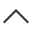

In [4]:
#Importing Killings and Injuries DataSet
url = 'https://www.gunviolencearchive.org/reports'
response = requests.get(url)
soup = BeautifulSoup(response.content)
print(soup)

In [27]:
url = "https://www.gunviolencearchive.org/reports"
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

year_links = {}
for year in range(2014, 2019):
    year_links[year] = []
    for link in soup.find_all('a', href=True):
        if str(year) in link['href'] and 'Mass Shooting' in link.text:
            year_links[year].append(link['href'])

all_data = []
for year in range(2014, 2019):
    for link in year_links[year]:
        response = requests.get(link)
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table')
        for row in table.find_all('tr')[1:]:
            cells = row.find_all('td')
            data = {
                'Date': cells[0].text.strip(),
                'State': cells[1].text.strip(),
                'City_or_County': cells[2].text.strip(),
                'Address': cells[3].text.strip(),
                'Killed': cells[4].text.strip(),
                'Injured': cells[5].text.strip(),
                'Operations': cells[6].text.strip()
            }
            all_data.append(data)

Transform: Once the data has been extracted, it is transformed to make it usable and consistent. This could involve cleaning and standardizing the data, aggregating or disaggregating data, or joining data from multiple sources.

So, we now have two datasets: firearms and killings_and_injuries as a csv file. We are going to do data cleaning and data standardization before proceeding to transform and load the data. 


In [11]:
import csv

input_file = './firearms.csv'
output_file = 'cleaned_and_filtered_firearms_data.csv'

with open(input_file, 'r') as f_in, open(output_file, 'w', newline='') as f_out:
    reader = csv.DictReader(f_in)
    writer = csv.DictWriter(f_out, fieldnames=reader.fieldnames)

    writer.writeheader()

    for row in reader:
        if int(row['totals']) > 3:
            writer.writerow(row)


In [12]:
import csv

with open('firearms.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    with open('cleaned_firearms_data.csv', 'w', newline='') as cleaned_csv_file:
        writer = csv.DictWriter(cleaned_csv_file, fieldnames=['month', 'state', 'totals'])
        writer.writeheader()

        for row in reader:
            month = row['month']
            state = row['state']
            totals = int(row['totals'])
            
            if totals >= 3:
                writer.writerow({'month': month, 'state': state, 'totals': totals})

In [18]:
import csv

with open('killings_and_injuries.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)
    fieldnames = ['month', 'state', 'killed', 'injured']
    with open('cleaned_killings_and_injuries_data.csv', 'w', newline='') as new_file:
        writer = csv.DictWriter(new_file, fieldnames=fieldnames)
        writer.writeheader()
        for row in reader:
            writer.writerow({'month': row['Incident Date'].split('/')[0], 
                             'state': row['State'], 
                             'killed': row['# Killed'], 
                             'injured': row['# Injured']})

In [22]:
import csv

killings_file = open('cleaned_killings_and_injuries_data.csv')
killings_reader = csv.DictReader(killings_file)

firearms_file = open('cleaned_firearms_data.csv')
firearms_reader = csv.DictReader(firearms_file)

merged_data = {}

for row in killings_reader:
    month = row['month'][:7]
    state = row['state']
    if (month, state) not in merged_data:
        merged_data[(month, state)] = {
            'month': month,
            'state': state,
            'killed': row['killed'],
            'injured': row['injured'],
            'totals': '',
        }
    else:
        merged_data[(month, state)]['killed'] = row['killed']
        merged_data[(month, state)]['injured'] = row['injured']

for row in firearms_reader:
    month = row['month'][:7]
    state = row['state']
    
    if (month, state) not in merged_data:
        merged_data[(month, state)] = {
            'month': month,
            'state': state,
            'killed': '',
            'injured': '',
            'totals': row['totals'],
        }
    else:
        merged_data[(month, state)]['totals'] = row['totals']

with open('merged_data.csv', mode='w', newline='') as merged_file:
    fieldnames = ['month', 'state', 'killed', 'injured', 'totals']
    writer = csv.DictWriter(merged_file, fieldnames=fieldnames)
    writer.writeheader()
    
    for row in merged_data.values():
        writer.writerow(row)
        
killings_file.close()
firearms_file.close()

Now we have cleaned our datasets, now we need to load the data into an S3 bucket. 

In [25]:
import boto3

s3 = boto3.resource('s3')

bucket_name = 'Gun-Violence-Data'

with open('./merged_data.csv', 'rb') as data:
    s3.Bucket(bucket_name).put_object(Key='merged_data.csv', Body=data)

with open('./cleaned_firearms_data.csv', 'rb') as data:
    s3.Bucket(bucket_name).put_object(Key='cleaned_firearms_data.csv', Body=data)


Now that our csv files are in an s3 bucket. We need to do sql integration, then create a database and the schema

In [26]:
rds = boto3.client('rds')
response = rds.create_db_instance(
    DBName='GunViolenceData',
    DBInstanceIdentifier='mydbinstance',
    AllocatedStorage=20,
    DBInstanceClass='db.t2.micro',
    Engine='mysql',
    MasterUsername='admin',
    MasterUserPassword='mypassword'
)

waiter = rds.get_waiter('db_instance_available')
waiter.wait(DBInstanceIdentifier='mydbinstance')

conn = pymysql.connect(
    host='mydbinstance.xxxxxxxx.us-east-1.rds.amazonaws.com',
    user='admin',
    password='mypassword',
    db='GunViolenceData',
    cursorclass=pymysql.cursors.DictCursor
)

with conn.cursor() as cursor:
    cursor.execute('''
        CREATE TABLE Killings_and_Injuries (
            incident_id INT(11) NOT NULL,
            incident date DATE NOT NULL,
            state CHAR(2) NOT NULL,
            city_or_county VARCHAR(255),
            address VARCHAR(255),
            n_killed INT(11),
            n_injured INT(11),
            PRIMARY KEY (incident_id)
        )
    ''')


with conn.cursor() as cursor:
    cursor.execute('''
        CREATE TABLE Firearms (
            month VARCHAR(255) NOT NULL,
            state CHAR(2) NOT NULL,
            permit INT(11),
            permit_recheck INT(11),
            handgun INT(11),
            long_gun INT(11),
            other INT(11),
            multiple INT(11),
            admin INT(11),
            prepawn_handgun INT(11),
            prepawn_long_gun INT(11),
            prepawn_other INT(11),
            redemption_handgun INT(11),
            redemption_long_gun INT(11),
            redemption_other INT(11),
            returned_handgun INT(11),
            returned_long_gun INT(11),
            returned_other INT(11),
            rentals_handgun INT(11),
            rentals_long_gun INT(11),
            private_sale_handgun INT(11),
            private_sale_long_gun INT(11),
            private_sale_other INT(11),
            return_to_seller_handgun INT(11),
            return_to_seller_long_gun INT(11),
            return_to_seller_other INT(11),
            totals INT(11)
        )
    ''')



s3 = boto3.client('s3')
bucket_name = 'Gun-Violence-Data'
key1 = 'Killings_and_Injuries.csv'
key2 = 'Firearms.csv'
obj1 = s3.get_object(Bucket=bucket_name, Key=key1)
obj2 = s3.get_object(Bucket=bucket_name, Key=key2)

df1 = pd.read_csv(obj1['Body'])
df2 = pd.read_csv(obj2['Body'])

conn.commit()
conn

### 3.2 ACCESS TO YOUR REPOSITORY WITH THE LATEST, PRODUCTION READY CODE VERSION FOR SOLUTION

### 3.3 ACCESS TO DATABASE WITH EXAMPLE QUERIES TO TEST THAT ACCESS 

Example: If you developed an OLAP database as part of the solution, add them to relevant security group and provide the endpoint, port access credentials to run basic queries

# PART FOUR: VISUALIZATION

Tableau Workbook: Gun-Violence-Data